In [1]:
#importing all the necessary libraries required for the algorithm
import numpy as np
import math
import copy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data's given
df = pd.read_csv('classification_train.csv')
arr = df.to_numpy()
x_values_train = arr[:24000,2:786]
y_values_train = arr[:24000,1]
x_values_test = arr[24000:,2:786]
y_values_test = arr[24000:,1]
#for finding number of training examples and number of features
m = len(x_values_test)
n = len(df.columns)-2

#to view the csv file
df.head()
print(x_values_test.shape)

(6000, 784)


In [3]:
def euclidean_distance(x_values_1,x_values_2):
    distance = np.sqrt(np.sum((x_values_1-x_values_2)**2))
    return distance

In [4]:
def nearest_values(data_point,x_values,m,n):
    dist_array = []
    for i in range(m):
        distance = euclidean_distance(data_point,x_values[i])
        dist_array.append(distance)
    #making data frame of top k nearest neighbours
    distance_array = pd.DataFrame(dist_array)
    k_nearest_neighbours = distance_array.sort_values(0)
    return k_nearest_neighbours

In [5]:
def KNN_classification(k_nearest_neighbours,k):
    #k_nearest_neighbours = nearest_values(data_point,x_values,m,n,k)
    k_nearest_neighbours_array = y_values_train[k_nearest_neighbours[:k].index]
    #to find the highest occuring label among the k nearest neighbours
    unique,c = np.unique(k_nearest_neighbours_array,return_counts=True)
    i = np.argmax(c)
    return unique[i]

In [6]:
def y_predicted(k):
    y_predicted = np.zeros(m)
    for i in range(m):
        k_nearest_neighbours = nearest_values(x_values_test[i],x_values_train,m,n)
        temp = KNN_classification(k_nearest_neighbours,k)
        y_predicted[i] = temp
    return y_predicted

In [7]:
#for checking accuracy
def accuracy(y_predicted):
    equal = np.sum(y_predicted==y_values_test)
    accuracy = (equal/m)*100
    return accuracy

In [8]:
print(accuracy(y_predicted(8)))

81.53333333333333


1 80.06666666666666
2 80.16666666666666
3 80.93333333333334
4 81.28333333333333
5 81.23333333333333
6 81.45
7 81.45
8 81.53333333333333
9 81.36666666666666
10 81.38333333333333
11 81.15
12 80.83333333333333
13 80.95
14 80.75
15 80.86666666666666
16 80.43333333333334
17 80.60000000000001
18 80.41666666666667
19 80.23333333333333


ValueError: x and y must have same first dimension, but have shapes (200,) and (50,)

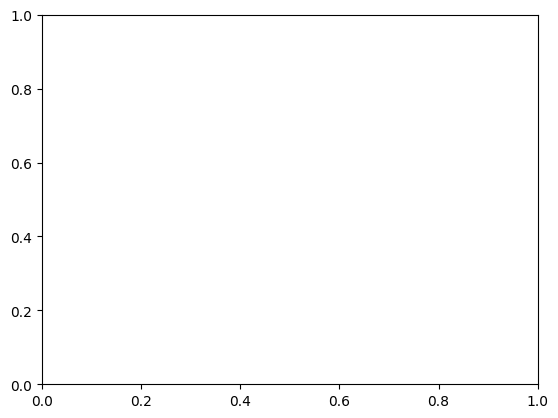

In [11]:
accur = np.zeros(50)
for i in range(1,20):
    accur[i]=accuracy(y_predicted(i))
    print(str(i)+" "+str(accur[i]))

    
plt.plot(range(200),accur,c='blue')
plt.xlabel("no of k ")
plt.ylabel("accuracy")
plt.show()

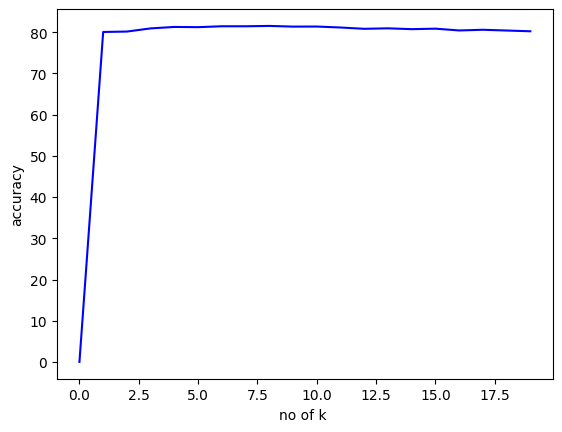

In [16]:
plt.plot(range(20),accur[:20],c='blue')
plt.xlabel("no of k ")
plt.ylabel("accuracy")
plt.show()